# PROJECT TITLE: RISK PROFILING FOR AIRCRAFT ACQUISITION


## Project Overview
- The Company is expanding into new industries to diversify its portfolio. The company is interested in purchasing and operating airplanes for commercial and private enterprises.
- In this project we will analyze a dataset from the National Transportation Safety Board (NTSB) that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and International waters.
- The goal is to analyze NTSB accident data to determine which aircraft are the lowest risk for the company to start a new business endeavor.
- This project will use data science techniques such as data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder. 
- At the end, this data-driven analysis will yield concrete business recommendations for how the company will move forward with the new aviation opportunity.


## Aircraft Risk Analysis

### 1. Data Preprocessing and Analysis

In [36]:
# Import all libraries needed for the analysis
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Load the dataset from NTSB that includes aviation accident data from 1962 to 2023
aviation_data = pd.read_csv(r"data\AviationData.csv", encoding='ISO-8859-1', low_memory=False, delimiter=',')


In [38]:
# Load the dataset that contains US state codes
USState_codes = pd.read_csv(r"data\USState_Codes.csv", encoding='ISO-8859-1', low_memory=False, delimiter=',')

In [39]:
# Preview the first few rows of the dataset to understand its structure and contents
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [40]:
USState_codes.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [41]:
# Information about the dataset, including the number of entries and data types of each column
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [42]:
# Describe the dataset to get a summary of the numerical columns
aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [43]:
# Check for missing values in the dataset
aviation_data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [44]:
# Check the number of unique values in each column to understand the diversity of data
aviation_data.nunique()

Event.Id                  87951
Investigation.Type            2
Accident.Number           88863
Event.Date                14782
Location                  27758
Country                     219
Latitude                  25589
Longitude                 27154
Airport.Code              10375
Airport.Name              24871
Injury.Severity             109
Aircraft.damage               4
Aircraft.Category            15
Registration.Number       79105
Make                       8237
Model                     12318
Amateur.Built                 2
Number.of.Engines             7
Engine.Type                  13
FAR.Description              31
Schedule                      3
Purpose.of.flight            26
Air.carrier               13590
Total.Fatal.Injuries        125
Total.Serious.Injuries       50
Total.Minor.Injuries         57
Total.Uninjured             379
Weather.Condition             4
Broad.phase.of.flight        12
Report.Status             17075
Publication.Date           2924
dtype: i

In [45]:
# Check the distribution of the 'Location' column to see the most common locations of aviation accidents
aviation_data['Location'].value_counts().head(10) 

ANCHORAGE, AK      434
MIAMI, FL          200
ALBUQUERQUE, NM    196
HOUSTON, TX        193
CHICAGO, IL        184
FAIRBANKS, AK      174
TUCSON, AZ         142
PHOENIX, AZ        132
ORLANDO, FL        132
ENGLEWOOD, CO      131
Name: Location, dtype: int64

### 2. Data Cleaning

In [46]:
#Handle missing values in the dataset by dropping rows with missing values
aviation_data = aviation_data.dropna(subset = ['Event.Id', 'Airport.Code', 'Airport.Name', 'Registration.Number', 'FAR.Description', 'Air.carrier', 'Report.Status', 'Publication.Date', 'Latitude', 'Longitude', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', 'Weather.Condition'])

In [47]:
# Check the information of the cleaned dataset to ensure the rows have been dropped successfully
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6132 entries, 63693 to 88600
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                6132 non-null   object 
 1   Investigation.Type      6132 non-null   object 
 2   Accident.Number         6132 non-null   object 
 3   Event.Date              6132 non-null   object 
 4   Location                6132 non-null   object 
 5   Country                 6132 non-null   object 
 6   Latitude                6132 non-null   object 
 7   Longitude               6132 non-null   object 
 8   Airport.Code            6132 non-null   object 
 9   Airport.Name            6132 non-null   object 
 10  Injury.Severity         6132 non-null   object 
 11  Aircraft.damage         6132 non-null   object 
 12  Aircraft.Category       6132 non-null   object 
 13  Registration.Number     6132 non-null   object 
 14  Make                    6132 non-nu

In [48]:
# Drop irrelevant columns
columns_to_drop = ['Event.Id', 'Airport.Code', 'Airport.Name', 'Registration.Number', 'FAR.Description', 'Air.carrier', 'Report.Status', 'Publication.Date', 'Accident.Number', 'Schedule', 'Broad.phase.of.flight']
aviation_data = aviation_data.drop(columns=[col for col in columns_to_drop if col in aviation_data.columns])

In [49]:
# Check the information of the cleaned dataset to ensure the colums have been dropped successfully
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6132 entries, 63693 to 88600
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      6132 non-null   object 
 1   Event.Date              6132 non-null   object 
 2   Location                6132 non-null   object 
 3   Country                 6132 non-null   object 
 4   Latitude                6132 non-null   object 
 5   Longitude               6132 non-null   object 
 6   Injury.Severity         6132 non-null   object 
 7   Aircraft.damage         6132 non-null   object 
 8   Aircraft.Category       6132 non-null   object 
 9   Make                    6132 non-null   object 
 10  Model                   6132 non-null   object 
 11  Amateur.Built           6132 non-null   object 
 12  Number.of.Engines       6132 non-null   float64
 13  Engine.Type             6132 non-null   object 
 14  Purpose.of.flight       6132 non-nu

In [50]:
# Display all the columns in the dataset to understand its structure better
pd.set_option('display.max_columns',20)

In [51]:
aviation_data.head()

,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
63693,Accident,2007-11-06,"OPA LOCKA, FL",United States,25.904167,-80.273611,Non-Fatal,Substantial,Airplane,Cessna,C208B,No,1.0,Turbo Prop,Business,NaN,NaN,NaN,2.0,VMC
63913,Accident,2008-01-01,"Sonoma, CA",United States,381326N,1222659W,Non-Fatal,Substantial,Airplane,Barnard/Stancil,Glastar,Yes,1.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC
63915,Accident,2008-01-02,"Loveland, CO",United States,040276N,0010504W,Non-Fatal,Substantial,Airplane,Cessna,152,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,1.0,VMC
63916,Accident,2008-01-02,"Brunswick, GA",United States,003196N,0812328W,Non-Fatal,Substantial,Airplane,Beech,A36,No,1.0,Reciprocating,Business,0.0,0.0,0.0,3.0,VMC
63923,Accident,2008-01-05,"Laurel, MD",United States,039436N,0764940W,Non-Fatal,Substantial,Airplane,DEAN PATRICK G,GENESIS,Yes,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC


In [52]:
# Fill missing data with 'Unknown' for categorical columns and 0 for numerical columns
aviation_data.fillna({'Location': 'Unknown', 'InjurySeverity': 'Unknown', 'AircraftDamage': 'Unknown', 'AircraftCategory': 'Unknown', 'Make': 'Unknown', 'Model': 'Unknown'}, inplace=True)
aviation_data.fillna(aviation_data.median(numeric_only = True), inplace=True)

In [53]:
# Check for missing values again to confirm they have been handled
aviation_data.isnull().sum() 

Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
dtype: int64

In [54]:
# Convert event_date to datetime
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'], errors='coerce')

In [55]:
# Filter accidents from 2000 onwards for more relevant trends
aviation_data = aviation_data[aviation_data['Event.Date'].dt.year >= 2000]

### 3. Data Imputation and Aggregation 

In [56]:
# Create a risk score based on the number of injuries and fatalities
# This is a simple scoring system where we assign weights to different types of injuries
# Assume Fatal injuries > Serious injuries > Minor injuries > no injuries
risk_weights = {
    'Total.Fatal.Injuries': 4,  
    'Total.Serious.Injuries': 2,  
    'Total.Minor.Injuries': 1, 
    'Total.Uninjured': 0  
}

# Define the function to compute risk
def compute_risk(row):
    risk = 0
    for col, weight in risk_weights.items():
        if col in aviation_data.columns:  
            risk += row[col] * weight
    return risk

# Apply the function to compute the risk score
if 'Total.Fatal.Injuries' in aviation_data.columns:
    aviation_data['risk_score'] = aviation_data.apply(compute_risk, axis=1)
else:
    aviation_data['risk_score'] = 0


In [57]:
# Verify the results
print(aviation_data[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'risk_score']].head())

       Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  \
63693                   0.0                     0.0                   0.0   
63913                   0.0                     0.0                   0.0   
63915                   0.0                     0.0                   0.0   
63916                   0.0                     0.0                   0.0   
63923                   0.0                     1.0                   0.0   

       Total.Uninjured  risk_score  
63693              2.0         0.0  
63913              3.0         0.0  
63915              1.0         0.0  
63916              3.0         0.0  
63923              0.0         2.0  


In [58]:
# Aggregate by Aircraft Make and Model
aircraft_summary = aviation_data.groupby(['Make', 'Model']).agg({
    'Total.Fatal.Injuries': 'sum',  
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum',
    'risk_score': 'mean'
}).reset_index()


In [59]:
# Preview the aggregated summary
print(aircraft_summary.head())

             Make      Model  Total.Fatal.Injuries  Total.Serious.Injuries  \
0     2021FX3 LLC   CCX-2000                   0.0                     0.0   
1      781569 INC     FX 210                   0.0                     3.0   
2           ADAMS  DRAGONFLY                   0.0                     0.0   
3  AERO ADVENTURE  ZEPHYR II                   1.0                     0.0   
4  AERO AT SP ZOO   AT-4 LSA                   0.0                     0.0   

   Total.Minor.Injuries  Total.Uninjured  risk_score  
0                   0.0              2.0         0.0  
1                   0.0              0.0         6.0  
2                   0.0              1.0         0.0  
3                   0.0              0.0         4.0  
4                   1.0              0.0         1.0  


In [60]:
# Create a new column for the year of the accident
if 'accident_count' not in aircraft_summary.columns:
    # Create 'accident_count' by summing up all injury-related columns
    aircraft_summary['accident_count'] = (
        aircraft_summary['Total.Fatal.Injuries'] +
        aircraft_summary['Total.Serious.Injuries'] +
        aircraft_summary['Total.Minor.Injuries'] +
        aircraft_summary['Total.Uninjured']
    )


In [61]:
# Calculate the number of years in the dataset
years_of_data = 2023 - 2000 + 1

# Calculate accidents per year
aircraft_summary['accidents_per_year'] = aircraft_summary['accident_count'] / years_of_data

# Preview the updated DataFrame
print(aircraft_summary[['Make', 'Model', 'accident_count', 'accidents_per_year']].head())

             Make      Model  accident_count  accidents_per_year
0     2021FX3 LLC   CCX-2000             2.0            0.083333
1      781569 INC     FX 210             3.0            0.125000
2           ADAMS  DRAGONFLY             1.0            0.041667
3  AERO ADVENTURE  ZEPHYR II             1.0            0.041667
4  AERO AT SP ZOO   AT-4 LSA             1.0            0.041667


### 4. Data Visualization

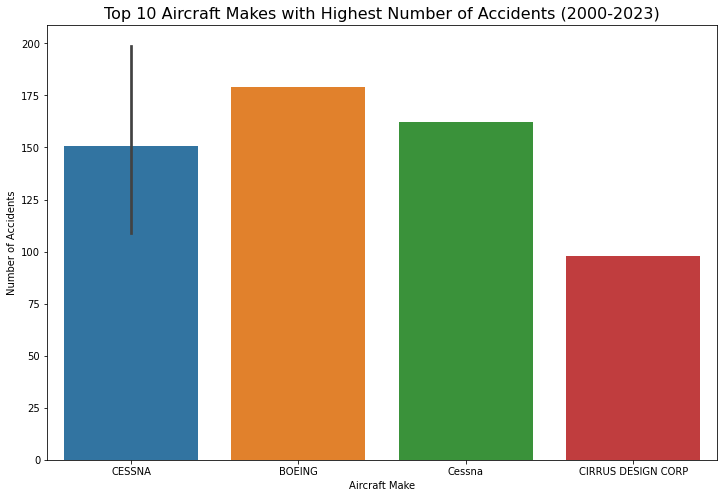

In [62]:
# Plot a bar chart of the top 10 aircraft makes with the highest number of accidents
plt.figure(figsize=(12, 8))
top_aircraft = aircraft_summary.nlargest(10, 'accident_count')
sns.barplot(x='Make', y='accident_count', data=top_aircraft)
plt.title('Top 10 Aircraft Makes with Highest Number of Accidents (2000-2023)', fontsize=16)
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.show()

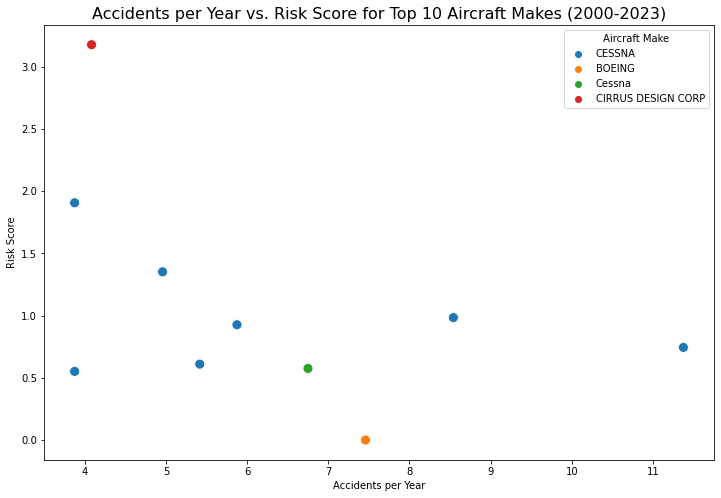

In [63]:
# Plot a scatter plot of accidents per year vs. risk score for the top 10 aircraft makes
plt.figure(figsize=(12, 8))
top_aircraft = aircraft_summary.nlargest(10, 'accidents_per_year')
sns.scatterplot(x='accidents_per_year', y='risk_score', hue='Make', data=top_aircraft, s=100)
plt.title('Accidents per Year vs. Risk Score for Top 10 Aircraft Makes (2000-2023)', fontsize=16)
plt.xlabel('Accidents per Year')
plt.ylabel('Risk Score')
plt.legend(title='Aircraft Make')
plt.show()


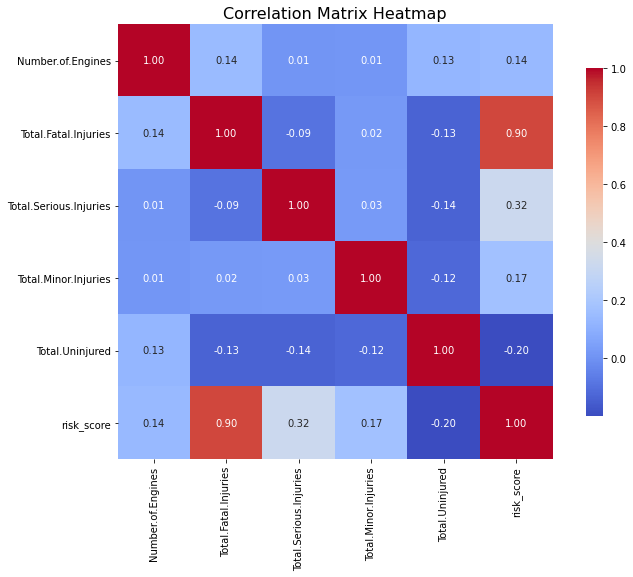

In [64]:
# Plot a heatmap of the correlation matrix for the numerical columns in the dataset
plt.figure(figsize=(12, 8))
correlation_matrix = aviation_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show() 

### 5. Recommendations 

In [65]:
# Recommendation 1: Focus on acquiring low-risk aircraft models
safest_aircraft = aircraft_summary.sort_values(by='risk_score').head(1)
print(f"Recommendation: Consider acquiring the {safest_aircraft.iloc[0]['Make']} {safest_aircraft.iloc[0]['Model']} with a risk score of {safest_aircraft.iloc[0]['risk_score']:.2f} to minimize operational risks.")

Recommendation: Consider acquiring the 2021FX3 LLC CCX-2000 with a risk score of 0.00 to minimize operational risks.


In [66]:
# Recommendation 2: Avoid high-risk aircraft models
riskiest_aircraft = aircraft_summary.sort_values(by='risk_score', ascending=False).head(1)
print(f"Recommendation: Avoid acquiring the {riskiest_aircraft.iloc[0]['Make']} {riskiest_aircraft.iloc[0]['Model']} with a high risk score of {riskiest_aircraft.iloc[0]['risk_score']:.2f} to reduce operational risks.")

Recommendation: Avoid acquiring the Textron Aviation B-300 with a high risk score of 40.00 to reduce operational risks.


In [67]:
# Recommendation 3: Focus on aircraft models with the lowest accident counts
safest_aircraft = aircraft_summary.sort_values(by='accident_count').head(1)
print(f"Recommendation: Consider acquiring the {safest_aircraft.iloc[0]['Make']} {safest_aircraft.iloc[0]['Model']} with only {safest_aircraft.iloc[0]['accident_count']} recorded accidents.")

Recommendation: Consider acquiring the THRUSH AIRCRAFT LLC S2R-T660 with only 0.0 recorded accidents.


In [68]:
# Recommendation 4: Focus on operations during the safest weather conditions
weather_safety = aviation_data['Weather.Condition'].value_counts()
safest_weather = weather_safety.idxmax()
print(f"Recommendation: Prioritize operations during '{safest_weather}' conditions, which have the highest recorded safety.")

Recommendation: Prioritize operations during 'VMC' conditions, which have the highest recorded safety.


In [69]:
# Recommendation 5: Focus on improving safety in the most accident-prone locations
top_location = aviation_data['Location'].value_counts().idxmax()
print(f"Recommendation: Prioritize safety measures in {top_location}, which has the highest number of recorded accidents.")

Recommendation: Prioritize safety measures in Phoenix, AZ, which has the highest number of recorded accidents.


In [71]:
# Saving the cleaned dataset as a CSV file for future use
aviation_data.to_csv(r"data\Cleaned_AviationData.csv", index=False)

### 6. Conclusion
- The analysis provides insights into the most common aircraft makes and models involved in accidents, the risk scores associated with different aircraft, and the trends in aviation accidents over time.
- The company can use this information to make informed decisions about aircraft purchases, safety measures, and risk management strategies.
- The analysis also highlights the importance of data-driven decision-making in the aviation industry, and how data can be used to improve safety and reduce risks.
- The company can leverage this analysis to enhance its safety protocols, improve training programs, and develop strategies to mitigate risks associated with specific aircraft makes and models.
- Overall, the analysis provides a comprehensive overview of aviation accidents and their associated risks, enabling the company to make informed decisions in the aviation industry.
- The analysis also emphasizes the importance of continuous monitoring and evaluation of aviation safety data to identify trends and areas for improvement.
- By leveraging data analytics, the company can enhance its safety measures, improve operational efficiency, and ultimately contribute to a safer aviation environment for all stakeholders involved.
- The analysis serves as a foundation for further research and exploration in the field of aviation safety, and encourages the company to stay proactive in addressing potential risks and challenges in the aviation industry.
- The company can also consider collaborating with aviation safety organizations and regulatory bodies to share insights and best practices, further enhancing its commitment to safety and risk management in the aviation sector.
